In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

In [15]:
## 한글설정
path = 'C:/Users/jaemi/AppData/Local/Microsoft/Windows/Fonts/NanumGothicCoding.ttf'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [16]:
## 여자의 나이에 따른 출산 나이
df_fe = pd.read_excel('./모의_연령_5세계급__모의_교육정도별_출생_20230515174731.xlsx', )
## 남자의 나이에 따른 출산 나이
df_ma = pd.read_excel('./부의_연령_부의_교육정도별_출생_20230515171225.xlsx', )
## 전국_연령별_장애유형별_성별_등록장애인수
df_data1 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515034425.xlsx')
df_data2 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515034348.xlsx')
df_data3 = pd.read_excel('./전국_연령별_장애유형별_성별_등록장애인수_20230515033734.xlsx')
## 전국 나이별 인구수
df_all = pd.read_excel('./201712_202212__.xlsx')


c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\jaemi\anaconda3\envs\pandas_jm\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [17]:
# 전체 여자의 계 계산
total_female = df_fe.iloc[0, 5:]
# 20대 여자의 데이터 추출
data_20_female = df_fe.iloc[30, 5:] + df_fe.iloc[40, 5:]
# 30대 여자의 데이터 추출
data_30_female = df_fe.iloc[50, 5:] + df_fe.iloc[60, 5:]
# 40대 여자의 데이터 추출
data_40_female = df_fe.iloc[70, 5:] + df_fe.iloc[80, 5:]

# 20대 여자의 비율 계산
ratio_20_female = data_20_female / total_female * 100
# 30대 여자의 비율 계산
ratio_30_female = data_30_female / total_female * 100
# 40대 여자의 비율 계산
ratio_40_female = data_40_female / total_female * 100

# 20~40대 연결
ratio_20_40_female = pd.concat([ratio_20_female, ratio_30_female, ratio_40_female], axis=1)

ratio_20_40_female.columns = ['20대 여자', '30대 여자', '40대 여자']

ratio_20_40_female

,20대 여자,30대 여자,40대 여자
2017,25.098177,70.908486,3.514818
2018,23.970847,71.650011,3.918341
2019,22.841917,72.233676,4.506469
2020,22.120755,72.419098,5.075329
2021,20.486487,73.50573,5.769068


In [18]:
# 전체 남자의 계 계산
total_male = df_ma.iloc[0, 5:]
# 20대 남자의 데이터 추출
data_20_male = df_ma.iloc[30, 5:] + df_ma.iloc[40, 5:]
# 30대 남자의 데이터 추출
data_30_male = df_ma.iloc[50, 5:] + df_ma.iloc[60, 5:]
# 40대 남자의 데이터 추출
data_40_male = df_ma.iloc[70, 5:] + df_ma.iloc[80, 5:]

# 20대 남자의 비율 계산
ratio_20_male = data_20_male / total_male * 100
# 30대 남자의 비율 계산
ratio_30_male = data_30_male / total_male * 100
# 40대 남자의 비율 계산
ratio_40_male = data_40_male / total_male * 100

# 20~40대 연결
ratio_20_40_male = pd.concat([ratio_20_male, ratio_30_male, ratio_40_male], axis=1)

ratio_20_40_male.columns = ['20대 남자', '30대 남자', '40대 남자']

ratio_20_40_male

,20대 남자,30대 남자,40대 남자
2017,11.329314,73.874909,13.169597
2018,10.881152,73.536359,13.876055
2019,10.369834,72.817138,14.979714
2020,10.054822,72.000867,16.030874
2021,9.408126,71.803256,16.916511


In [19]:
# 년도별 장애인수 추출
df_data1_short = df_data1.loc[:26,['2017','2018']]
df_data2_short = df_data2.loc[:26,['2019','2020']]
df_data3_short = df_data3.loc[:26,['2021']]

# 년도별 총 장애인수 추출
df1_loc = df_data1_short.iloc[3::6, :]
df2_loc = df_data2_short.iloc[3::6, :]
df3_loc = df_data3_short.iloc[3::6, :]

df1_sum = df1_loc.sum()
df2_sum = df2_loc.sum()
df3_sum = df3_loc.sum()

df_sum = pd.concat([df1_sum, df2_sum, df3_sum], axis=0)
df_sum

2017    89786
2018    90068
2019    90768
2020    90175
2021    91988
dtype: object

In [20]:
## 년도별 20대 미만 인구수
data_by_year = {
    '2017': df_all.iloc[3, 4:6].sum(),
    '2018': df_all.iloc[3, 16:18].sum(),
    '2019': df_all.iloc[3, 28:30].sum(),
    '2020': df_all.iloc[3, 40:42].sum(),
    '2021': df_all.iloc[3, 52:54].sum(),
}
sr = pd.Series(data_by_year)
sr



2017    9739623
2018    9434215
2019    9125924
2020    8763406
2021    8469666
dtype: int64

In [21]:
## 장애 비율 계산
ratio_under_20 = df_sum / sr * 100
ratio_under_20

under_20_df = pd.DataFrame(ratio_under_20, columns=['장애인 비율'])
under_20_df

,장애인 비율
2017,0.921863
2018,0.954695
2019,0.994617
2020,1.028995
2021,1.086088


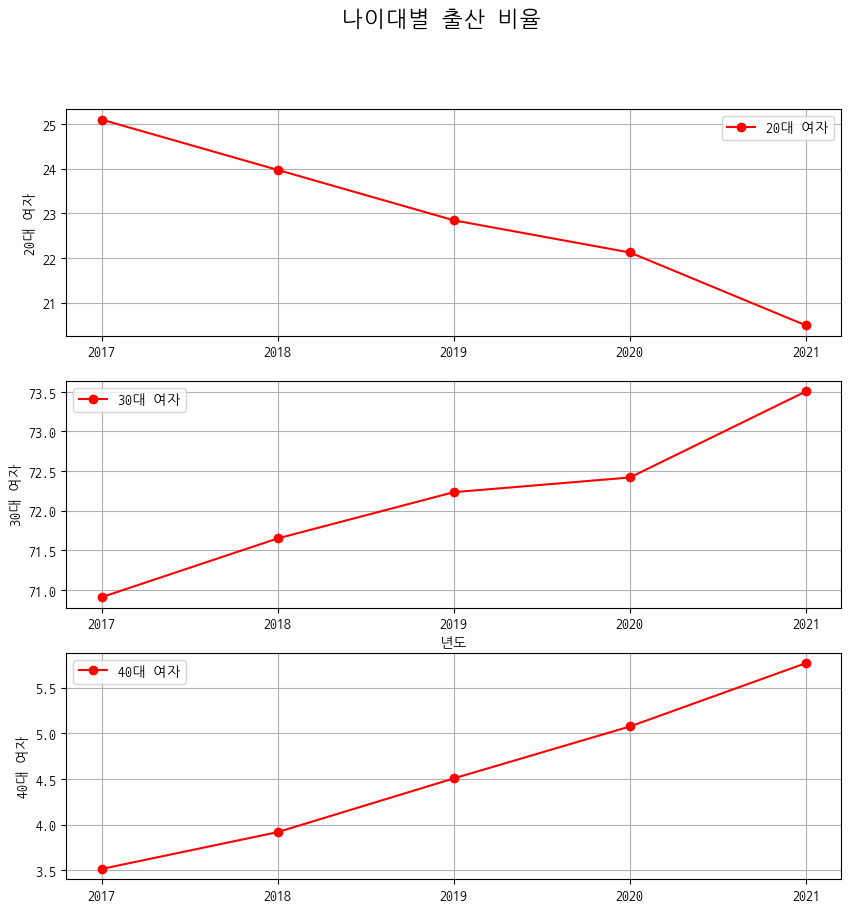

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 여자 비율 그래프 그리기
ax[0].plot(ratio_20_female, 'ro-', label='20대 여자')

# 30대 여자 비율 그래프 그리기
ax[1].plot(ratio_30_female, 'ro-', label='30대 여자')

# 40대 여자 비율 그래프 그리기
ax[2].plot(ratio_40_female, 'ro-', label='40대 여자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
ax[1].set_xlabel('년도')
ax[0].set_ylabel('20대 여자')
ax[1].set_ylabel('30대 여자')
ax[2].set_ylabel('40대 여자')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

plt.show()

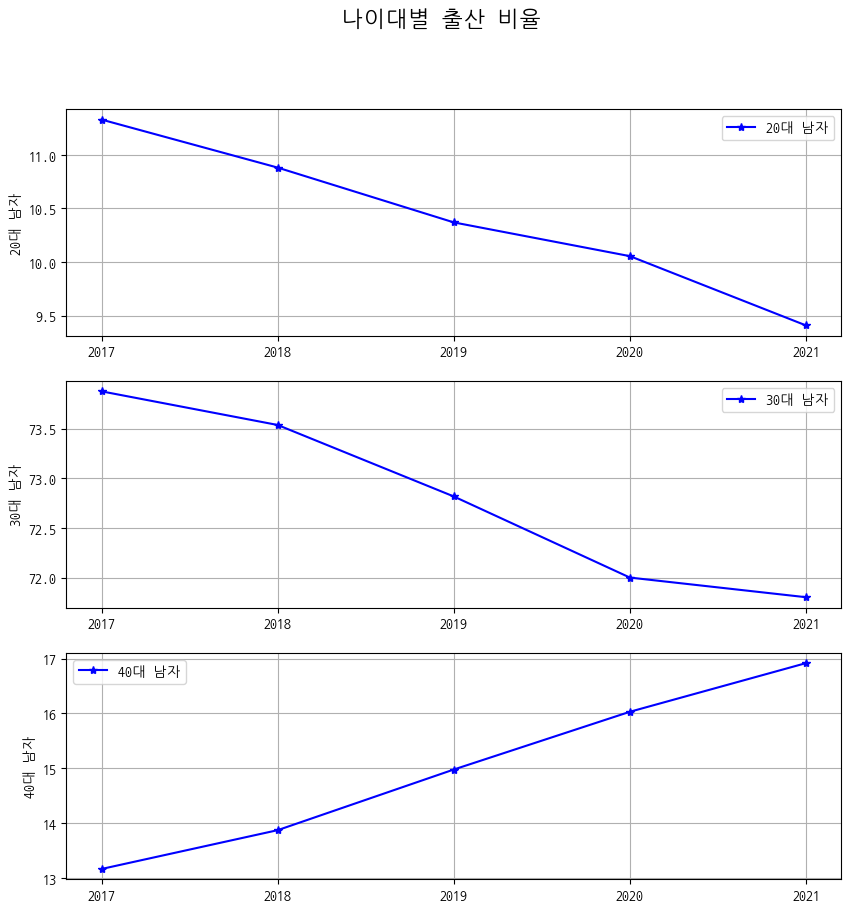

In [34]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# 20대 남자 비율 그래프 그리기
ax[0].plot(ratio_20_male, 'b*-', label='20대 남자')

# 30대 남자 비율 그래프 그리기
ax[1].plot(ratio_30_male, 'b*-', label='30대 남자')

# 40대 남자 비율 그래프 그리기
ax[2].plot(ratio_40_male, 'b*-', label='40대 남자')

# 그래프 타이틀과 레이블 설정
fig.suptitle('나이대별 출산 비율', fontsize=16)
# ax[1].set_xlabel('년도')
ax[0].set_ylabel('20대 남자')
ax[1].set_ylabel('30대 남자')
ax[2].set_ylabel('40대 남자')
ax[0].legend()
ax[1].legend()
ax[2].legend()

# 그래프 출력
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

plt.show()

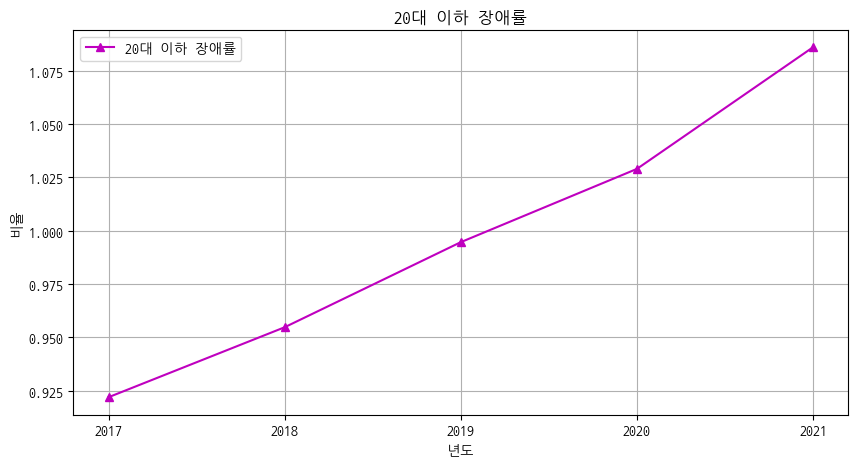

In [33]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 쟁애 발생률 그래프 그리기
plt.plot(ratio_under_20, 'm^-', label='20대 이하 장애률')

# 그래프 타이틀과 레이블 설정
plt.title('20대 이하 장애률')
plt.xlabel('년도')
plt.ylabel('비율')
plt.legend()

# 그래프 출력
plt.grid(True)
plt.show()

In [25]:
# 상관관계 비교
cor = pd.concat([under_20_df, ratio_20_40_female, ratio_20_40_male], axis= 1).corr()
    
cor


,장애인 비율,20대 여자,30대 여자,40대 여자,20대 남자,30대 남자,40대 남자
장애인 비율,1.000000,-0.997899,0.987871,0.998661,-0.998073,-0.968499,0.993017
20대 여자,-0.997899,1.000000,-0.994958,-0.994404,0.999638,0.960991,-0.988969
30대 여자,0.987871,-0.994958,1.000000,0.979310,-0.992538,-0.929796,0.969400
40대 여자,0.998661,-0.994404,0.979310,1.000000,-0.995775,-0.979271,0.997206
20대 남자,-0.998073,0.999638,-0.992538,-0.995775,1.000000,0.967168,-0.992021
30대 남자,-0.968499,0.960991,-0.929796,-0.979271,0.967168,1.000000,-0.990988
40대 남자,0.993017,-0.988969,0.969400,0.997206,-0.992021,-0.990988,1.000000


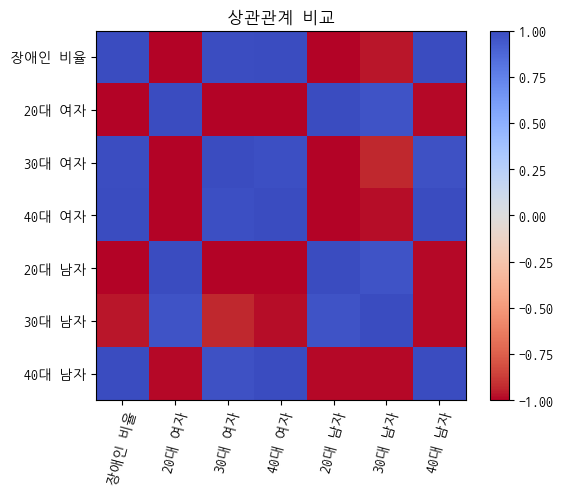

In [26]:
# 상관계수 그래프
plt.imshow(cor, cmap='coolwarm_r', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(cor)), cor.keys(), rotation = 75)
plt.yticks(range(len(cor)), cor.keys())

plt.title('상관관계 비교')

plt.show()